# Question 1

51
0
100
0
105
256


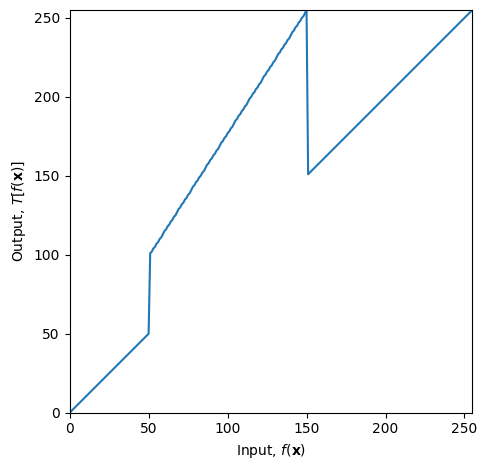

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0,50,51).astype('uint8')   # 0,50,101
print(len(t1))

t2 = np.linspace(51,100,0).astype('uint8')   #51,200,50
print(len(t2))

t3 = np.linspace(101,255,100).astype('uint8')   #201,255,105
print(len(t3))

t4 = np.linspace(255,150,0).astype('uint8')   # 0,50,101
print(len(t4))

t5 = np.linspace(151,255,105).astype('uint8')   #51,200,50
print(len(t5))


transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots(1)
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $T[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()


img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

# Question 2

256


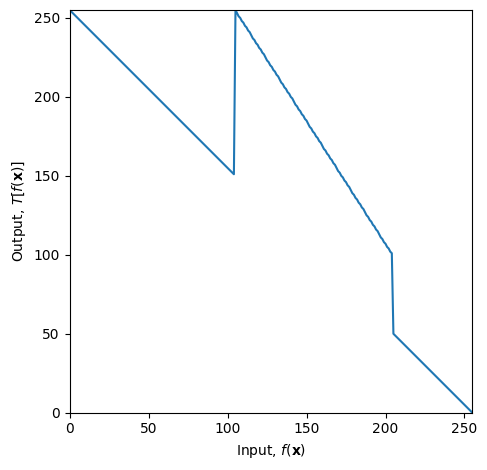

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t1 = np.linspace(0,50,51).astype('uint8')   # 0,50,101
t2 = np.linspace(51,100,0).astype('uint8')   #51,200,50
t3 = np.linspace(101,255,100).astype('uint8')   #201,255,105
t4 = np.linspace(255,150,0).astype('uint8')   # 0,50,101
t5 = np.linspace(151,255,105).astype('uint8')   #51,200,50



transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')

transform=np.flip(transform)        #flipping the intensity map array of ealier to get negative. 
print(len(transform))



fig, ax = plt.subplots(1)
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $T[f(\mathbf{x})]$')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()


img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)

image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

# Question 3

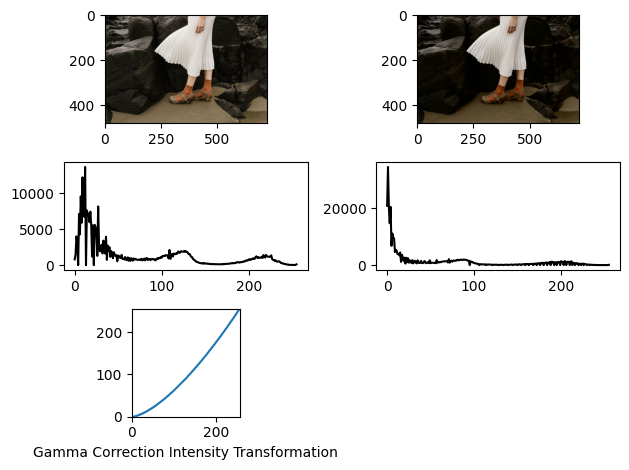

In [8]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the original image
img_orig = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)

# Convert the image to LAB color space
img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)

# Extract the L channel
L_channel = img_lab[:, :, 0]

# Apply gamma correction to the L channel
gamma = 1.5
table = np.array([(i/255.0)**gamma*255.0 for i in np.arange(0, 256)]).astype('uint8')
L_channel_gamma = cv.LUT(L_channel, table)

# Replace the gamma corrected L channel in the LAB image
img_lab_gamma = img_lab.copy()
img_lab_gamma[:, :, 0] = L_channel_gamma

# Convert the LAB image with gamma corrected L channel back to RGB
img_gamma = cv.cvtColor(img_lab_gamma, cv.COLOR_LAB2BGR)
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)

# Create subplots
f, axarr = plt.subplots(3, 2)

# Display the original and gamma corrected images
axarr[0, 0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
axarr[0, 1].imshow(img_gamma)

# Plot histograms for L channel
hist_orig = cv.calcHist([L_channel], [0], None, [256], [0, 256])
axarr[1, 0].plot(hist_orig, color='k')

hist_gamma = cv.calcHist([L_channel_gamma], [0], None, [256], [0, 256])
axarr[1, 1].plot(hist_gamma, color='k')

# Plot the gamma correction table
axarr[2, 0].plot(table)
axarr[2, 0].set_xlabel("Gamma Correction Intensity Transformation")
axarr[2, 0].set_xlim(0, 255)
axarr[2, 0].set_ylim(0, 255)
axarr[2, 0].set_aspect('equal')

axarr[2, 1].axis('off')

# Show the plots
plt.tight_layout()
plt.show()
